In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import pickle

Using TensorFlow backend.


In [7]:
pickle_in = open('X_full.pickle', 'rb')
X = pickle.load(pickle_in)

In [8]:
pickle_in = open('y_full.pickle', 'rb')
y = pickle.load(pickle_in)

In [ ]:
X_train = X[:400,:,:,:]
y_train = y[:400]

In [9]:
X.shape

(877, 300, 265, 1)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X.shape[1:], activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(),
             metrics=['accuracy'])

W0921 19:34:12.283501 139890275972928 deprecation_wrapper.py:119] From /home/canadauni/miniconda3/envs/analysis/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0921 19:34:12.391246 139890275972928 deprecation.py:323] From /home/canadauni/miniconda3/envs/analysis/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
class_weight={
    0:1.0,
    1:100.0
}
model.fit(X, y, batch_size=64, epochs=5, validation_split=0.1)

W0921 19:34:20.501894 139890275972928 deprecation_wrapper.py:119] From /home/canadauni/miniconda3/envs/analysis/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 90 samples, validate on 10 samples
Epoch 1/5
90/90 [==============================] - 7s 80ms/step - loss: 6020.4495 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.6000
Epoch 2/5
90/90 [==============================] - 6s 71ms/step - loss: 106.1722 - accuracy: 0.6667 - val_loss: 651.2806 - val_accuracy: 0.5000
Epoch 3/5
90/90 [==============================] - 6s 71ms/step - loss: 463.4382 - accuracy: 0.5111 - val_loss: 655.4796 - val_accuracy: 0.5000
Epoch 4/5
90/90 [==============================] - 6s 71ms/step - loss: 448.6563 - accuracy: 0.5556 - val_loss: 10.0997 - val_accuracy: 0.5000
Epoch 5/5
90/90 [==============================] - 7s 72ms/step - loss: 5.6723 - accuracy: 0.5556 - val_loss: 0.6237 - val_accuracy: 0.6000


In [7]:
from PIL import Image
from IPython.display import display
import numpy as np

In [8]:
im = Image.open('/media/data/Datasets/TrafficImages/Test/201904281722.jpg')

In [9]:
box = (120, 30, 420, 295)
region = im.crop(box).convert('L')

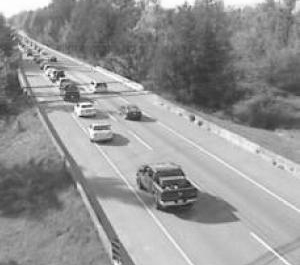

In [10]:
display(region)

In [11]:
im_arr = np.array(region)

In [12]:
im_arr = im_arr.reshape(-1, 300, 265, 1)

In [13]:
prediction = model.predict([im_arr])

In [14]:
prediction

array([[0.]], dtype=float32)

In [15]:
prediction[0][0]

0.0